<a href="https://colab.research.google.com/github/priyankaborwanker/COVID-19-Data-Time-Series-Analysis-Using-R/blob/main/COVID19_Data_Initial_Analysis_using_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# activate R magic
%reload_ext rpy2.ipython

In [ ]:
%%R
install.packages("forecast")
install.packages("smooth")

UsageError: Cell magic `%%R` not found.


R[write to console]: data.table 1.14.2 using 1 threads (see ?getDTthreads).  Latest news: r-datatable.com



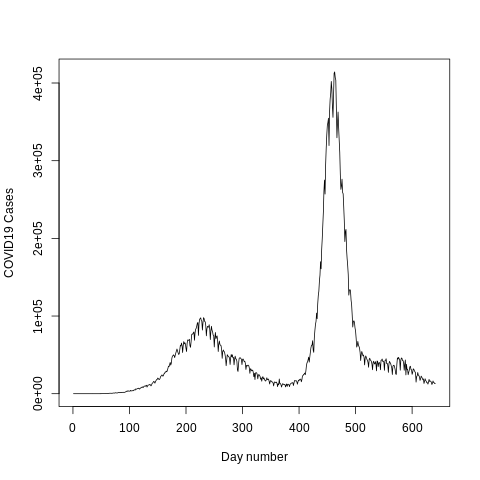

In [ ]:
%%R 
library(data.table)
daily_confirmed <- fread(file = '/content/gdrive/My Drive/case_time_series.csv',select = c("Daily Confirmed"))
daily_confirmed <- ts(daily_confirmed, frequency = 1, start = c("1"), end = c("641"))
plot(daily_confirmed, xlab ='Day number', ylab = 'COVID19 Cases')

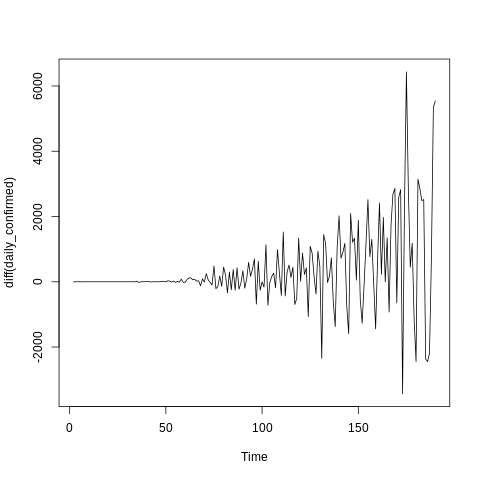

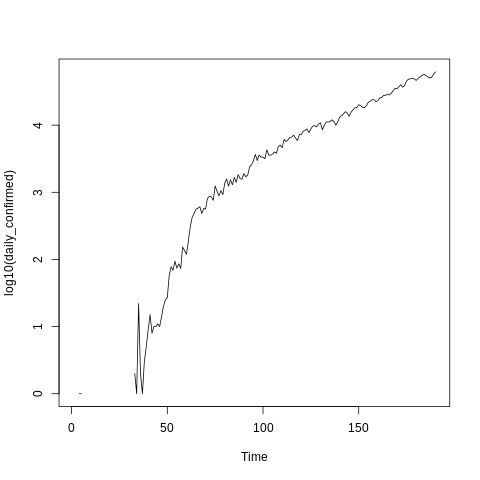

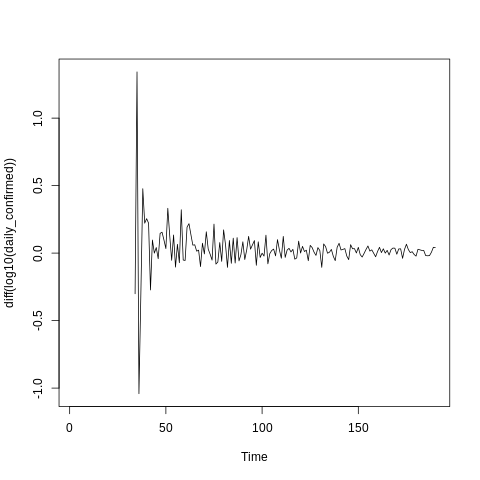

In [ ]:
#Decomposition of various time series components like trend,seasonality etc
%%R
plot(diff(daily_confirmed))
plot(log10(daily_confirmed))
plot(diff(log10(daily_confirmed)))


	Ljung-Box test

data:  Residuals from Naive method
Q* = 116.75, df = 10, p-value < 2.2e-16

Model df: 0.   Total lags used: 10



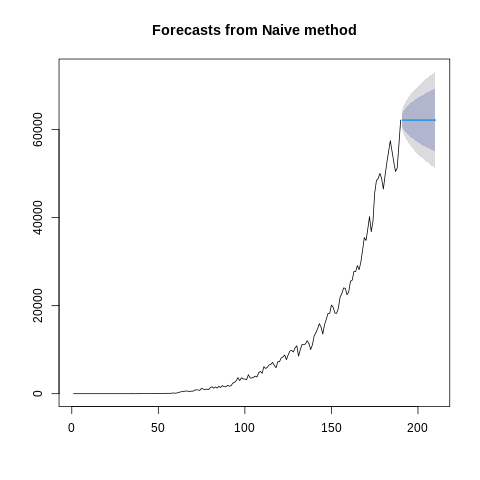

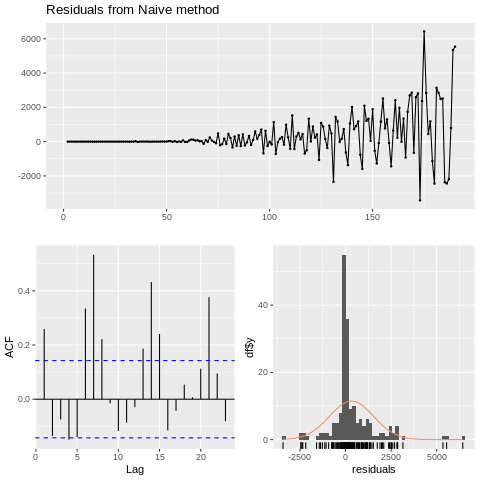

In [ ]:
#Naive method prediction 
%%R
library(forecast)
naive_prediction <- naive(daily_confirmed, h=20)
plot(naive_prediction)
checkresiduals(naive_prediction)
#We dont have seasonal data so no need for the seasonal naive method

R[write to console]: Loading required package: greybox

R[write to console]: Package "greybox", v1.0.2 loaded.


R[write to console]: 
Attaching package: ‘greybox’


R[write to console]: The following object is masked from ‘package:forecast’:

    forecast


R[write to console]: This is package "smooth", v3.1.4




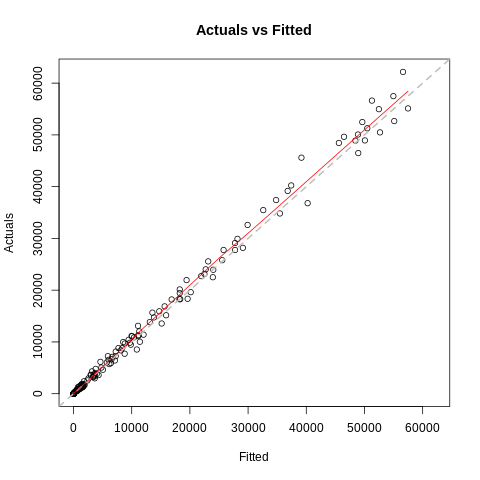

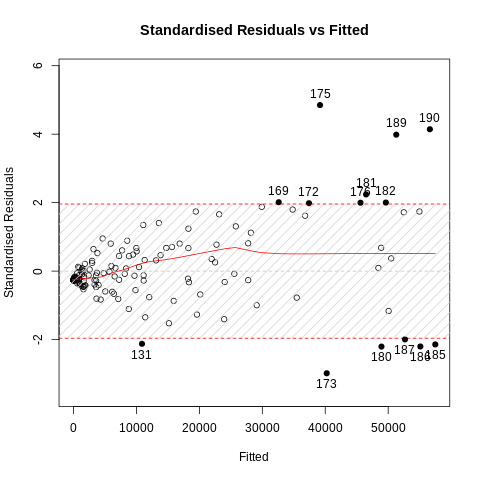

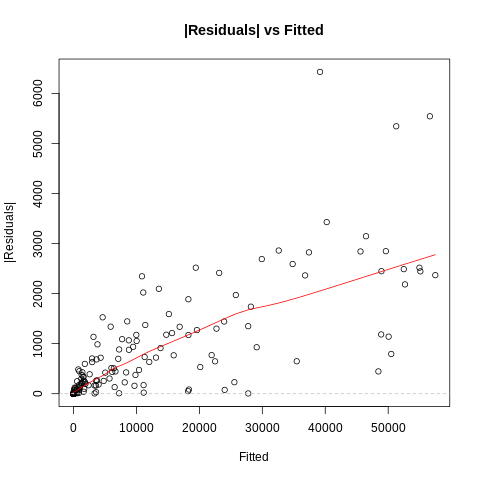

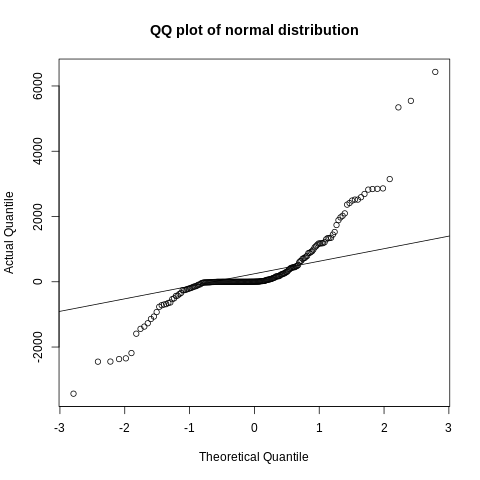

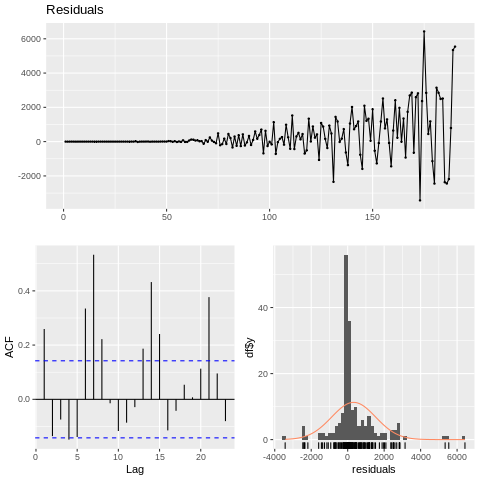

In [ ]:
#Simple moving average prediction
%%R
library(forecast)
library(smooth)
simple_moving_average <- sma(daily_confirmed)
plot(simple_moving_average)
checkresiduals(simple_moving_average)

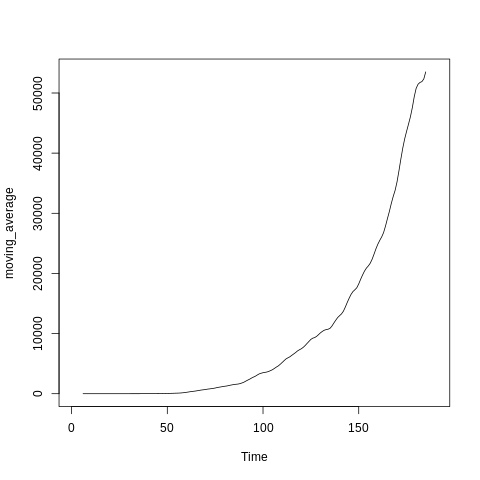

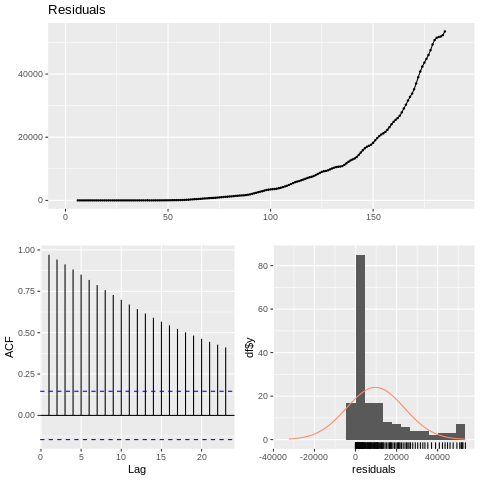

In [ ]:
#Moving average prediction
%%R
moving_average <- ma(daily_confirmed,10)
plot(moving_average)
checkresiduals(moving_average)


	Ljung-Box test

data:  Residuals from ETS(A,A,N)
Q* = 130.49, df = 6, p-value < 2.2e-16

Model df: 4.   Total lags used: 10



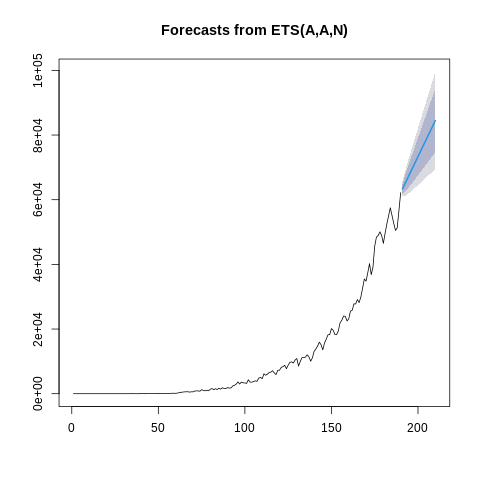

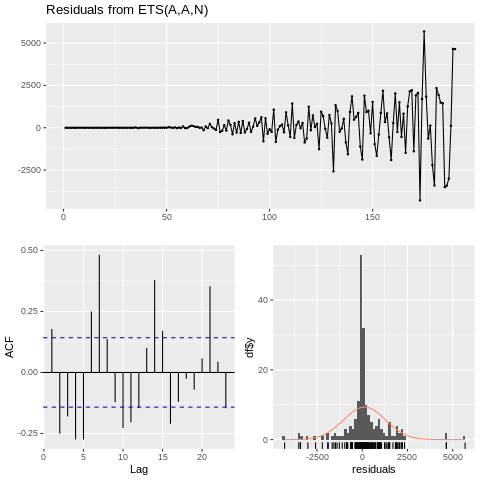

In [ ]:
#using forecast() method
%%R
using_forecast <- forecast(daily_confirmed,h=20)
plot(using_forecast)
checkresiduals(using_forecast)


	Ljung-Box test

data:  Residuals from Simple exponential smoothing
Q* = 117.38, df = 8, p-value < 2.2e-16

Model df: 2.   Total lags used: 10



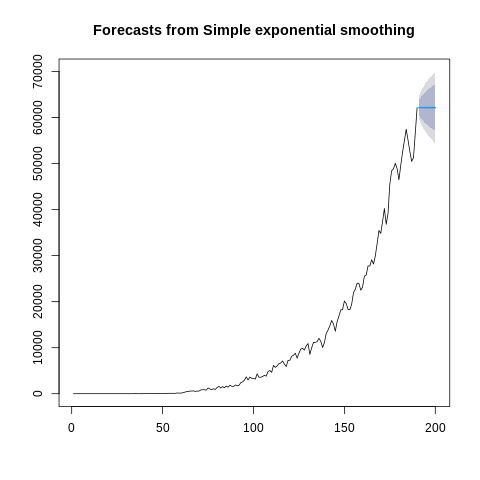

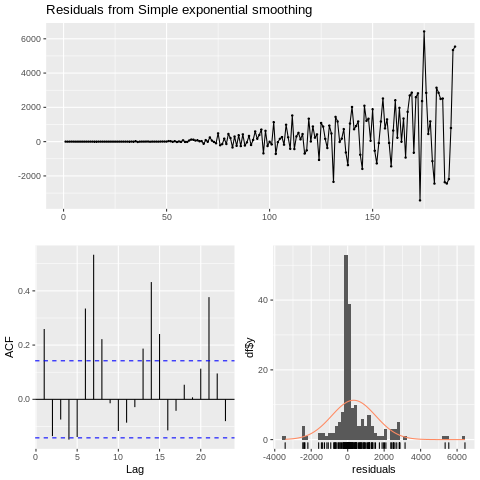

In [ ]:
#using simple exponential smoothing
%%R
simple_exponential_smoothening <- ses(daily_confirmed,10)
plot(simple_exponential_smoothening)
checkresiduals(simple_exponential_smoothening)


	Ljung-Box test

data:  Residuals from ARIMA(3,2,2)
Q* = 77.497, df = 5, p-value = 2.776e-15

Model df: 5.   Total lags used: 10



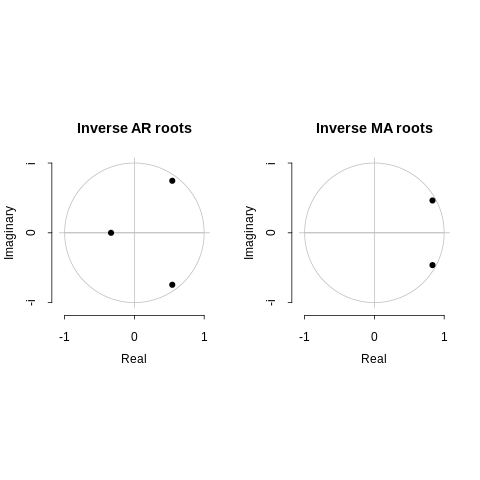

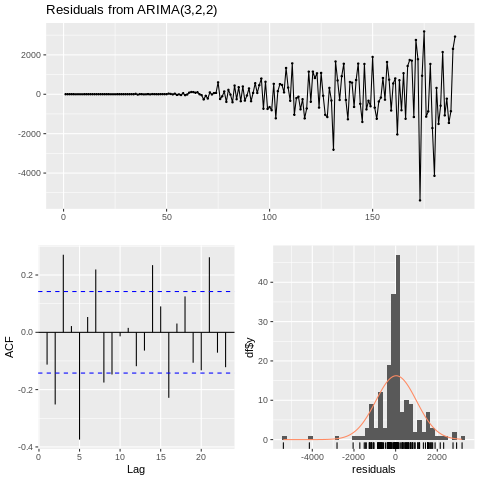

In [ ]:
#Using auto.arima() method
%%R
auto_arima <- auto.arima(daily_confirmed)
plot(auto_arima)
checkresiduals(auto_arima)

In [ ]:
#Doubts:
#1. This data has no seasonality, just upward trend is present. So many seasonal forecasting methods cannot be applied
#2. How to inspect residuals?
#3. We only have total covid cases, cannot use anything other than regression models. 